In [ ]:
#khai báo thư viện

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
rice  = pd.read_excel('/content/Rice_Cammeo_Osmancik.xlsx', sheet_name='Rice')

In [ ]:
rice

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [ ]:
rice.describe() # mô tả dữ liệu gạo
#std độ lệch chuẩn
#mean trung bình

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [ ]:
rice.isnull().sum() # đếm số lượng giá trị null trong mỗi cột

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

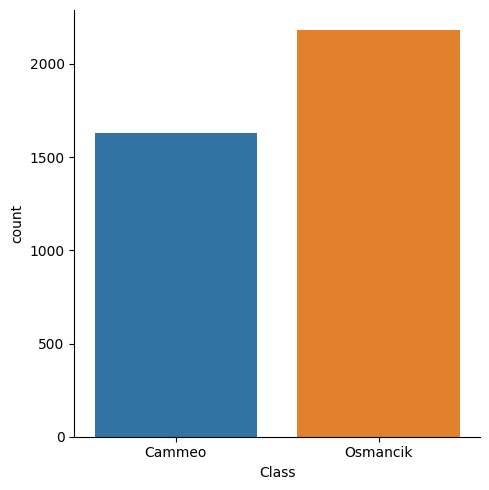

In [ ]:
sns.catplot(data=rice, x='Class', kind='count'); # tạo một biểu đồ thống kê dữ liệu phân loại

In [ ]:
rice_2 = rice.copy()
rice_2['Class'] = rice_2['Class'].map({'Cammeo':1,'Osmancik':0}) #thay đổi dữ liệu 2 loại gạo thành 1 và 0 tương ứng

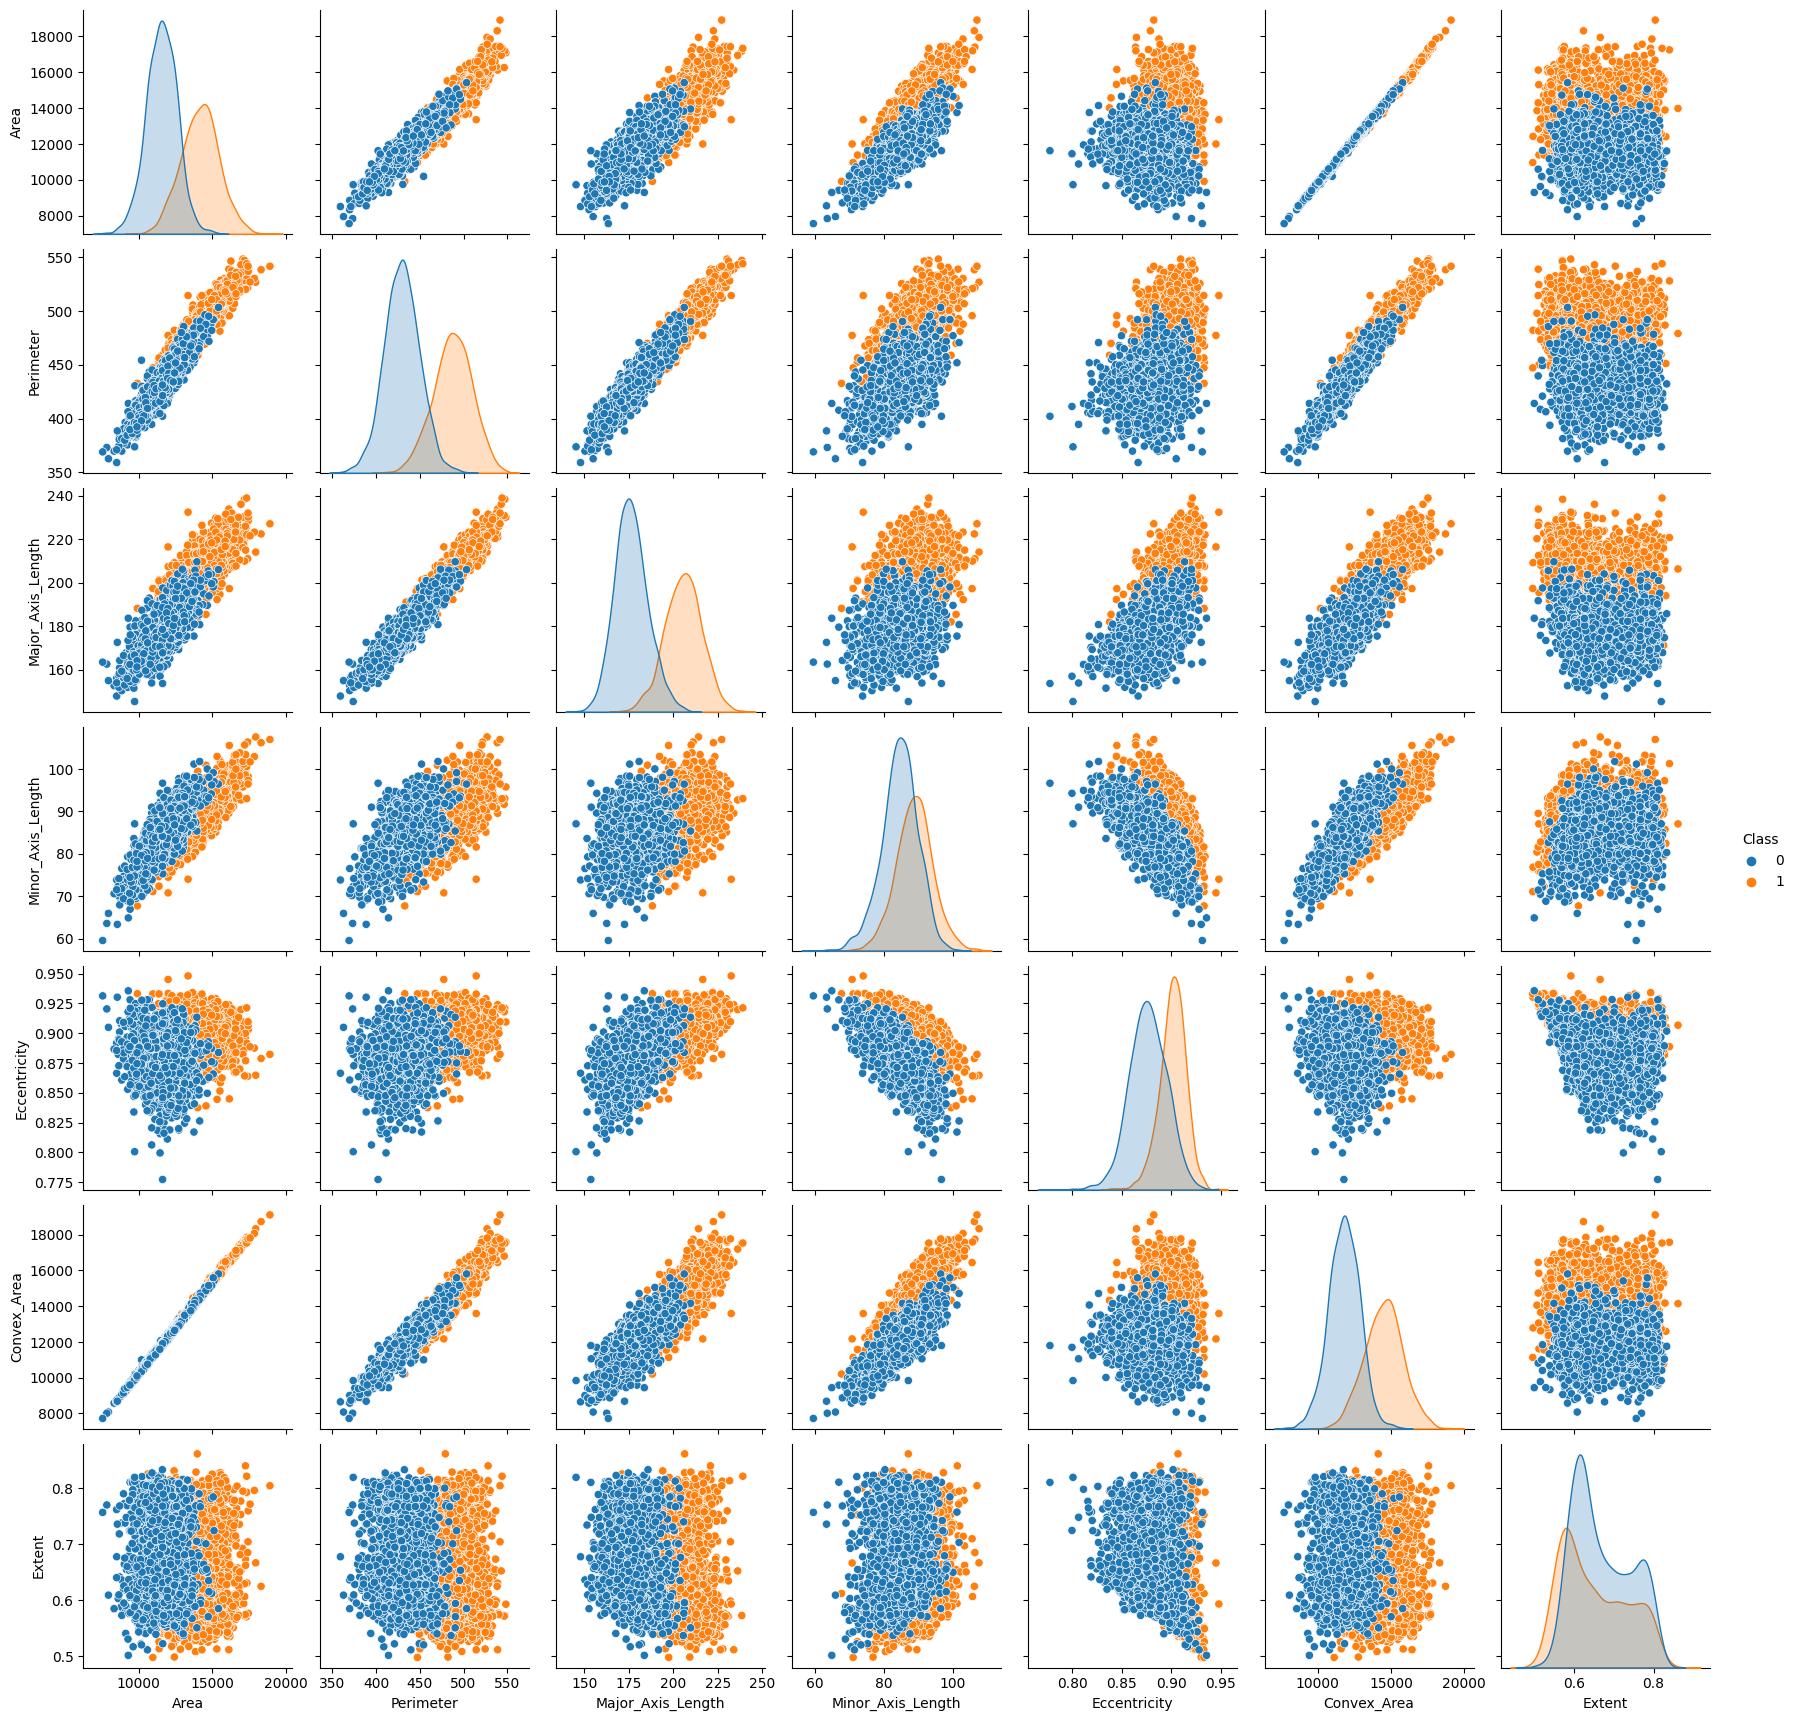

In [ ]:
sns.pairplot(rice_2, hue='Class');
# tạo một biểu đồ pair plot (biểu đồ ghép cặp)
# màu sắc (hue) được xác định bởi cột "Class"

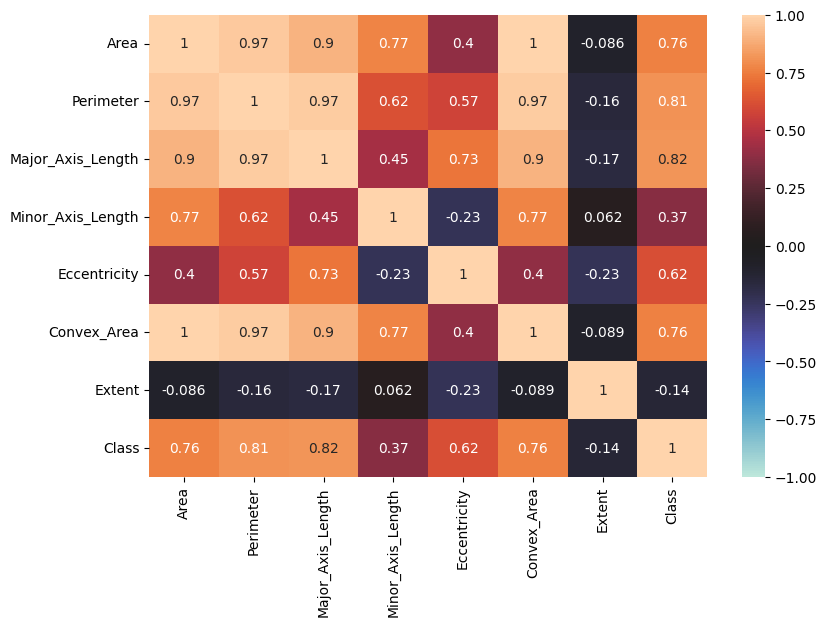

In [ ]:
corr = rice_2.corr('spearman') #spearman đo độ tương quan
plt.figure(figsize=(9,6))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);
# tạo một biểu đồ heatmap (biểu đồ nhiệt)

**tiền xử lý dữ liệu**
1. Làm sạch dữ liệu
2. Xử lý giá trị thiếu
3. Chuyển đổi định dạng
4. Chuẩn hóa dữ liệu
5. Tạo đặc trưng mới

In [ ]:
X_rice_2 = rice_2.iloc[:, 0:6].values

In [ ]:
Y_rice_2 = rice_2.iloc[:, 7].values
Y_rice_2

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
scaler_rice = StandardScaler()
X_rice_2 = scaler_rice.fit_transform(X_rice_2)

In [ ]:
X_rice_2[0]

array([ 1.47982953,  2.0043543 ,  2.34854657, -0.21294263,  2.01833745,
        1.49965944])

In [ ]:
X_rice_2_train, X_rice_2_test, Y_rice_2_train, Y_rice_2_test = train_test_split(X_rice_2, Y_rice_2, test_size = 0.20, random_state = 0)

In [ ]:
Y_rice_2_train.shape, X_rice_2_train.shape

((3048,), (3048, 6))

In [ ]:
Y_rice_2_test.shape, X_rice_2_test.shape

((762,), (762, 6))

**mô hình phân loại và kết quả**


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Random_Forest = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_depth=3, random_state=0)
#khởi tạo với 100 cây quyết định
#sử dụng entropy làm tiêu chí để đo lường chất lượng một phép chia
#random_state được thiết lập là 0 để đảm bảo kết quả có thể tái lặp được
Random_Forest.fit(X_rice_2_train, Y_rice_2_train)
rice_2_RF = Random_Forest.predict(X_rice_2_test)

In [ ]:
print('Accuracy: ', accuracy_score(Y_rice_2_test, rice_2_RF,)) # Độ chính xác
print('precision: ', precision_score(Y_rice_2_test, rice_2_RF)) # Độ chính xác dương tính
print('F1: ', f1_score(Y_rice_2_test, rice_2_RF)) #Kết hợp giữa precision và recall.
print('Recall: ', recall_score(Y_rice_2_test, rice_2_RF)) #Độ bao phủ hoặc độ phục hồi

Accuracy:  0.931758530183727
precision:  0.9411764705882353
F1:  0.9212121212121211
Recall:  0.9020771513353115


In [ ]:
print(classification_report(Y_rice_2_test, rice_2_RF));

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       425
           1       0.94      0.90      0.92       337

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



In [ ]:
confusion_matrix(Y_rice_2_test, rice_2_RF)

array([[406,  19],
       [ 33, 304]])

Axes(0.125,0.11;0.62x0.77)


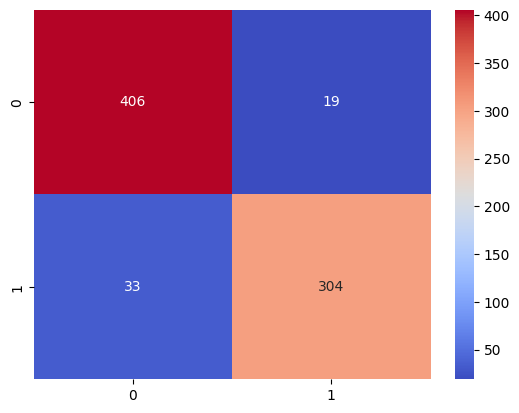

In [ ]:
print(sns.heatmap(confusion_matrix(Y_rice_2_test, rice_2_RF), annot=True, cmap="coolwarm", fmt='g'));
#heatmap thể hiện đúng hoặc sai của dữ liệu

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NaiveB = GaussianNB()
NaiveB.fit(X_rice_2_train, Y_rice_2_train)
rice_2_NB = NaiveB.predict(X_rice_2_test)

In [ ]:
print('Accuracy: ', accuracy_score(Y_rice_2_test, rice_2_NB))
print('Precision: ', precision_score(Y_rice_2_test, rice_2_NB))
print('F1: ', f1_score(Y_rice_2_test, rice_2_NB))
print('Recall: ', recall_score(Y_rice_2_test, rice_2_NB))

Accuracy:  0.9291338582677166
Precision:  0.9380804953560371
F1:  0.9181818181818181
Recall:  0.8991097922848664


In [ ]:
print(classification_report(Y_rice_2_test, rice_2_NB));

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       425
           1       0.94      0.90      0.92       337

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



In [ ]:
confusion_matrix(Y_rice_2_test, rice_2_NB)

array([[405,  20],
       [ 34, 303]])

Axes(0.125,0.11;0.62x0.77)


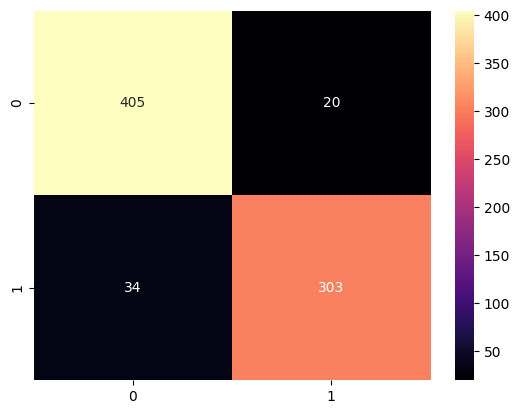

In [ ]:
print(sns.heatmap(confusion_matrix(Y_rice_2_test, rice_2_NB), annot=True, cmap="magma", fmt='g'));

In [ ]:
from sklearn.mixture import GaussianMixture #sử dụng thuật GaussianMixture

In [ ]:
GMix = GaussianMixture(n_components=2) #Tạo một đối tượng GaussianMixture với số lượng thành phần mình cho là 2
GMix.fit(X_rice_2_train, Y_rice_2_train) # Huấn luyện mô hình trên dữ liệu
rice_2_GMix = GMix.predict(X_rice_2_test) # Gán nhãn cho các điểm dữ liệu

In [ ]:
print('Accuracy: ', accuracy_score(Y_rice_2_test, rice_2_GMix))
print('Precision: ', precision_score(Y_rice_2_test, rice_2_GMix))
print('F1: ', f1_score(Y_rice_2_test, rice_2_GMix))
print('Recall: ', recall_score(Y_rice_2_test, rice_2_GMix))

Accuracy:  0.1010498687664042
Precision:  0.04922279792746114
F1:  0.05255878284923928
Recall:  0.05637982195845697


In [ ]:
print(classification_report(Y_rice_2_test, rice_2_GMix));

              precision    recall  f1-score   support

           0       0.15      0.14      0.14       425
           1       0.05      0.06      0.05       337

    accuracy                           0.10       762
   macro avg       0.10      0.10      0.10       762
weighted avg       0.11      0.10      0.10       762



In [ ]:
confusion_matrix(Y_rice_2_test, rice_2_GMix)

array([[ 58, 367],
       [318,  19]])

Axes(0.125,0.11;0.62x0.77)


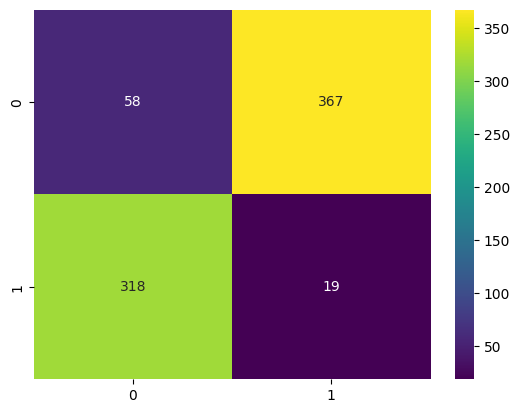

In [ ]:
print(sns.heatmap(confusion_matrix(Y_rice_2_test, rice_2_GMix), annot=True, cmap="viridis", fmt='g'));

In [ ]:
# sử dụng thuật toán birch
from sklearn.cluster import Birch

In [ ]:
BRC = Birch(n_clusters=2,branching_factor=51)
BRC.fit(X_rice_2_train, Y_rice_2_train)
rice_2_BRC = BRC.predict(X_rice_2_test)

In [ ]:
print('Accuracy: ', accuracy_score(Y_rice_2_test, rice_2_BRC))
print('Precision: ', precision_score(Y_rice_2_test, rice_2_BRC))
print('F1: ', f1_score(Y_rice_2_test, rice_2_BRC))
print('Recall: ', recall_score(Y_rice_2_test, rice_2_BRC))

Accuracy:  0.9238845144356955
Precision:  0.9345794392523364
F1:  0.911854103343465
Recall:  0.8902077151335311


In [ ]:
print(classification_report(Y_rice_2_test, rice_2_BRC));

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       425
           1       0.93      0.89      0.91       337

    accuracy                           0.92       762
   macro avg       0.93      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



In [ ]:
confusion_matrix(Y_rice_2_test, rice_2_BRC)

array([[404,  21],
       [ 37, 300]])

Axes(0.125,0.11;0.62x0.77)


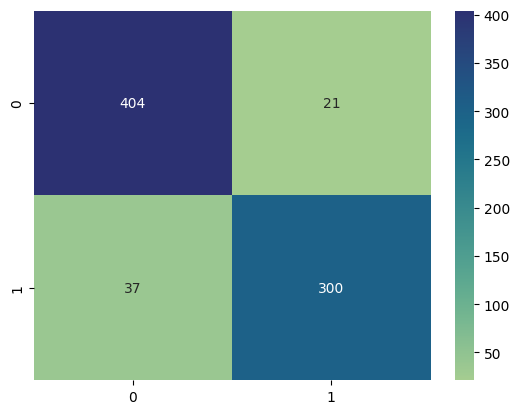

In [ ]:
print(sns.heatmap(confusion_matrix(Y_rice_2_test, rice_2_BRC), annot=True, cmap="crest", fmt='g'));